In [1]:
from scipy.io import loadmat
datas = loadmat("./CD_PD.mat", squeeze_me=True)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from IPython.display import SVG,display
from graphviz import Source
from sklearn.metrics import precision_recall_fscore_support,accuracy_score

In [3]:
df = pd.DataFrame(data=datas['dat'])
df1 = df.drop(df.columns[[7,8,9,10,11]], axis=1)

df_date_sorted=df.assign(f = lambda x: [f'{i[6:]}-{i[3:5]}-{i[:2]}' for i in x.date]).sort_values('f').drop('f',axis=1)
df_date_sorted = df_date_sorted.drop(df_date_sorted.columns[[1,2,3,4,5,7,8,9,10,11]],axis=1)

x = df_date_sorted.iloc[:,:2]
y_diag = df_date_sorted.iloc[:,2].astype(int)
y_clock = df_date_sorted.iloc[:,3].astype(int)

X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y_diag, random_state=0)

<H1>Diagnosis Classifier Model1</H1>

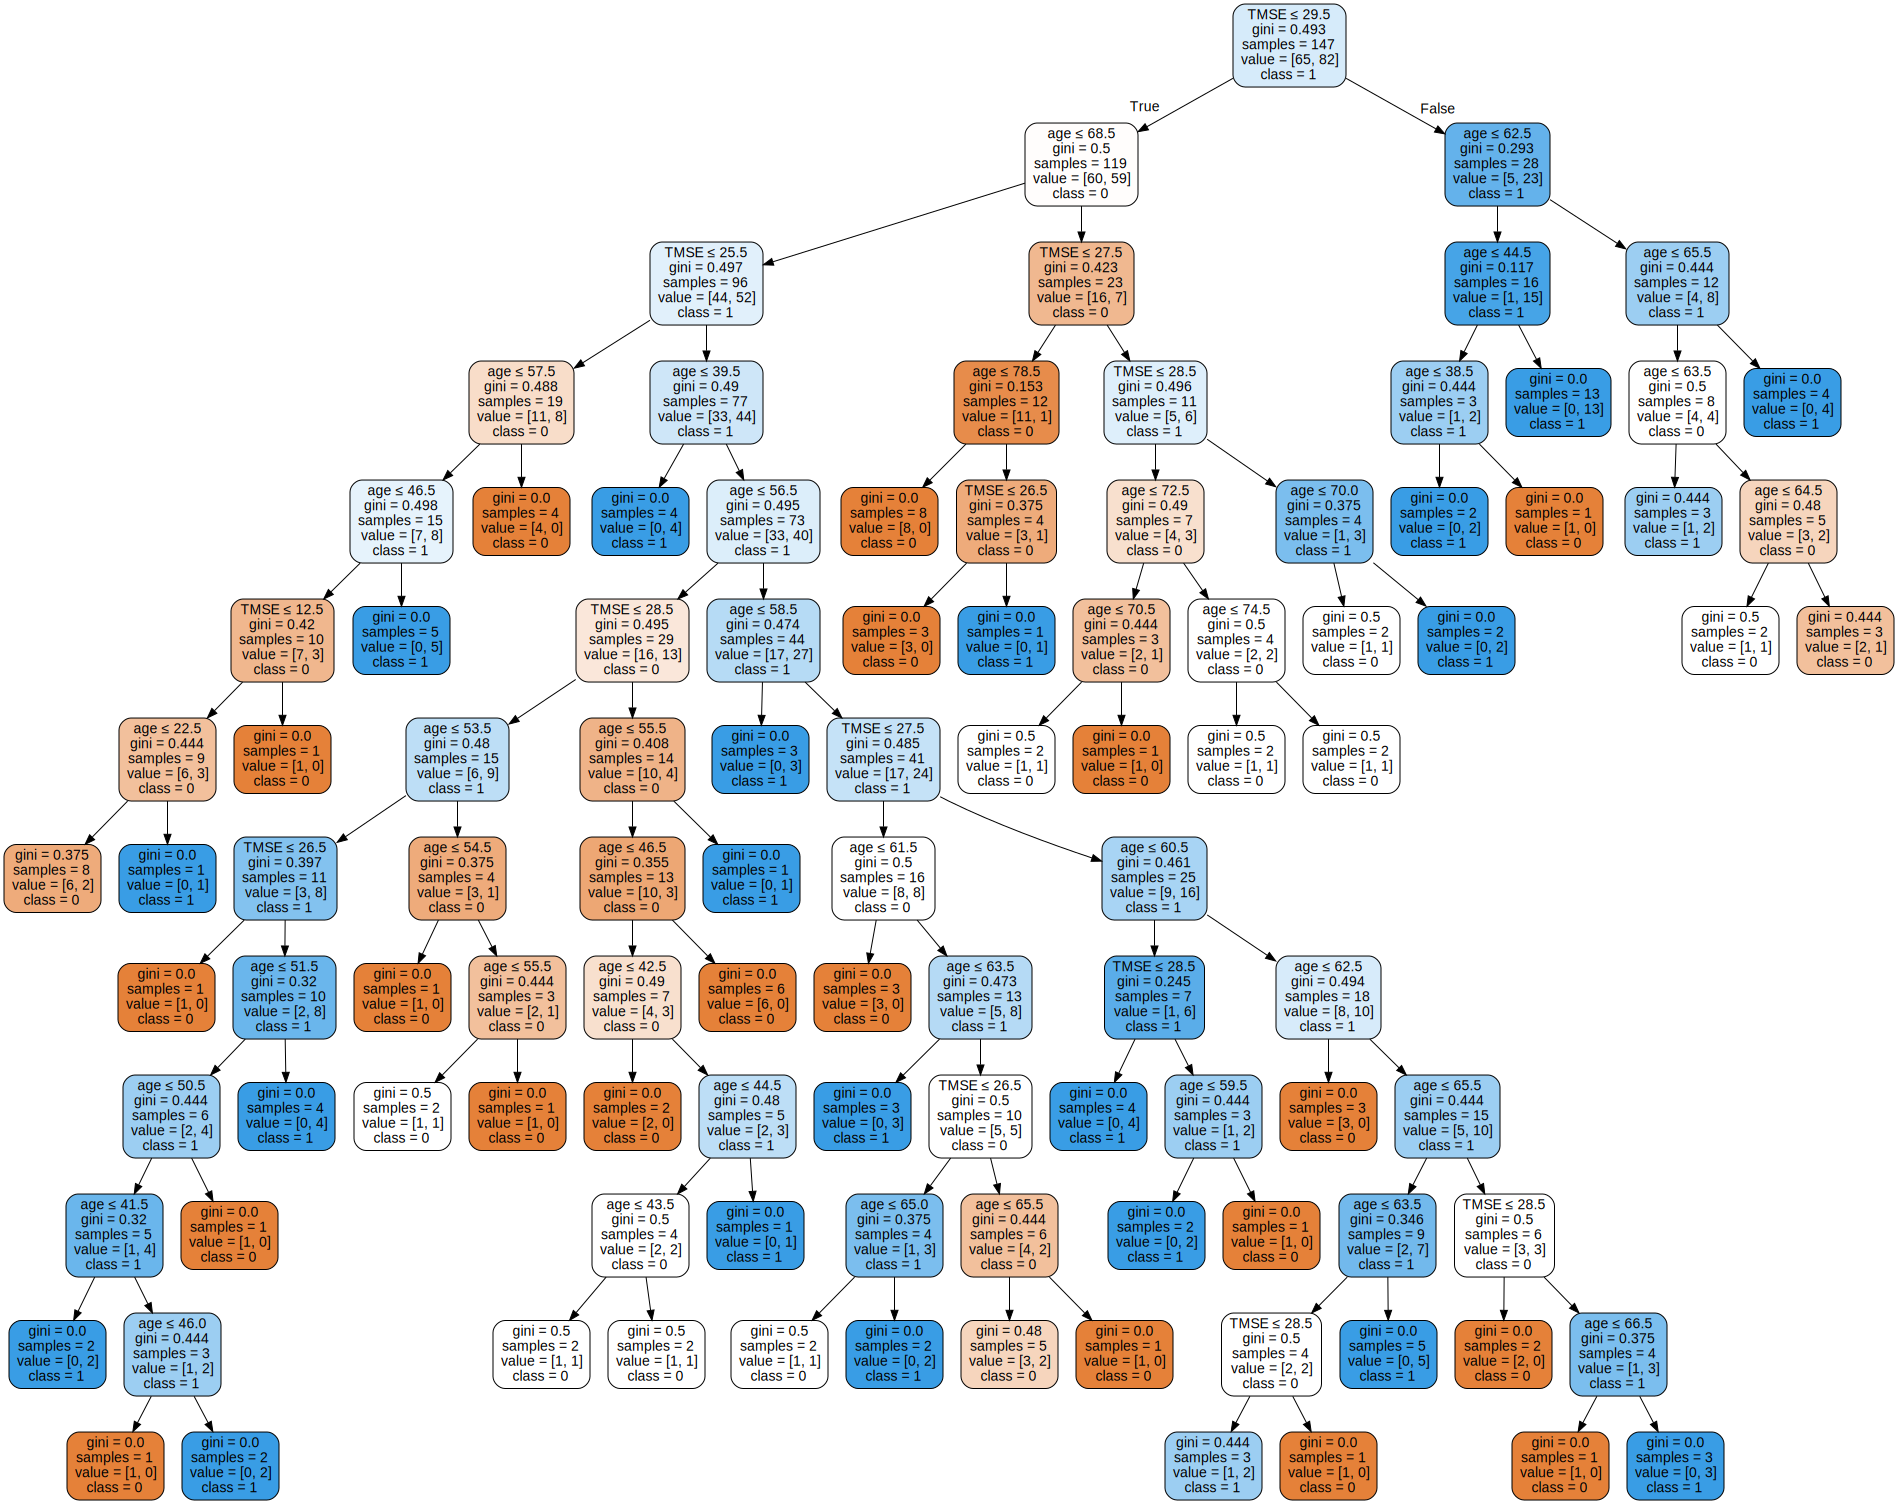

In [4]:
model1 = DecisionTreeClassifier(random_state=0)
model1.fit(X_train1,y_train1)
graph = Source(export_graphviz(model1,filled=1,rounded=1,special_characters=1,feature_names=X_train1.columns,class_names=['0','1']))
display(SVG(graph.pipe(format='svg')))

In [5]:
a = precision_recall_fscore_support(y_test1,model1.predict(X_test1),average='micro')
a

(0.6938775510204082, 0.6938775510204082, 0.6938775510204082, None)

<P><b>Prepared mean speed feature and total_time feature</P>

In [6]:
df

,age,date,duration,ed,gender,side,TMSE,t,x,y,p,pt,diagnosis,clock_drawing
0,45,16/09/2015,0,4-Bachelor degree,1-Female,1-Right,0,"[0.0, 9.266659617424011e-08, 1.157168298959732...","[653.4375, 646.0667, 647.625, 362.64642, 362.7...","[171.75, 171.75, 171.75, 54.778854, 59.935043,...","[0.09411766, 0.078431375, 0.078431375, 0.57303...","[1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, ...",1,0
1,64,29/09/2015,0,5-More than bachelor degree,0-Male,1-Right,30,"[0.0, 1.852167770266533e-07, 3.704335540533066...","[17.39536, 13.801709, 4.9477825, 3.229079, 4.2...","[684.9287, 682.58496, 678.10583, 675.97046, 67...","[0.042989742, 0.031265266, 0.0014655594, 0.040...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",1,0
2,50,29/09/2015,0,4-Bachelor degree,1-Female,1-Right,28,"[0.0, 5.78584149479866e-08, 2.662418410181999e...","[370.40662, 370.40662, 370.30246, 370.30246, 3...","[69.57036, 69.57036, 68.47662, 68.47662, 68.47...","[0.34978017, 0.34978017, 0.39081582, 0.4367366...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",1,1
3,67,30/09/2015,0,4-Bachelor degree,1-Female,1-Right,30,"[0.0, 2.314336597919464e-07, 4.281755536794662...","[370.51077, 370.40662, 370.40662, 370.40662, 3...","[64.51834, 63.42459, 63.42459, 63.42459, 63.42...","[0.3404983, 0.43673667, 0.52515876, 0.56424034...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",1,0
4,64,23/09/2015,0,2-High school,1-Female,1-Right,26,"[0.0, 5.78584149479866e-08, 2.5460030883550644...","[353.7404, 353.7404, 353.7404, 353.7404, 353.7...","[63.94542, 63.94542, 63.94542, 63.94542, 63.94...","[0.50512946, 0.50512946, 0.53981435, 0.5315095...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,0,02/08/2016,0,0-No education,0-Male,0-Left,0,"[0.0, 3.480818122625351e-08, 3.241002559661865...","[390.354, 390.354, 390.0936, 389.62485, 389.36...","[65.40375, 65.40375, 63.58084, 61.862106, 60.8...","[0.30581337, 0.30581337, 0.3478261, 0.3727406,...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0,1
192,64,10/11/2015,6,1-Primary school,1-Female,1-Right,26,"[0.0, 4.6333298087120056e-08, 2.43075191974639...","[352.64667, 352.64667, 351.91754, 351.7613, 35...","[99.77838, 99.77838, 98.47632, 97.38257, 97.38...","[0.4074255, 0.4074255, 0.52222764, 0.58671224,...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0,1
193,69,16/02/2016,3,2-High school,0-Male,1-Right,29,"[0.0, 2.430751919746399e-07, 4.398170858621597...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[822.5, 822.5, 825.2515, 825.7169, 826.35583, ...","[0.08235294, 0.09019608, 0.10196079, 0.1098039...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0,1
194,51,10/11/2015,6,1-Primary school,1-Female,1-Right,27,"[0.0, 1.5052501112222672e-07, 3.58792021870613...","[359.26108, 359.26108, 359.26108, 358.0632, 35...","[63.320435, 63.320435, 63.320435, 63.94542, 63...","[0.4909624, 0.4372252, 0.24035174, 0.20371275,...","[1, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, ...",0,1


In [7]:
x = np.array(df['x'])
y = np.array(df['y'])
t = np.array(df['t'])
mean_speed_feature = []
total_time = []
for i in range(len(x)):
    sqr_delta_x = np.diff(x[i])**2
    sqr_delta_y = np.diff(y[i])**2
    distance = (sqr_delta_x+sqr_delta_y)**(1/2)
    delta_t = np.diff(t[i])
    index = [u for u,v in enumerate(delta_t) if v==0]
    delta_t = np.delete(delta_t,index)
    distance = np.delete(distance,index)
    speed = distance/delta_t
    ans = speed.mean()
    mean_speed_feature.append(ans)
    total_time.append(t[i][-1]-t[i][0])
print(mean_speed_feature)

[14406186.762953501, 12952383.832327383, 11383072.540917737, 11658184.160862593, 21447011.521523017, 26007801.579440273, 18353238.289390773, 11969331.187000135, 15185217.592782324, 21069517.262237478, 14315403.013167595, 17551404.32316478, 4823873.211083553, 14280097.473862212, 11480965.45381715, 15229649.671719188, 16137549.83578272, 16037483.190657996, 20864266.941315733, 22622225.253861245, 25702268.558577072, 42496317.19995148, 27733774.63071934, 20925038.230415836, 13818864.626749583, 20233724.937984582, 17423043.12735391, 8964459.58394522, 21448473.29606305, 16914371.516504806, 8831151.736759966, 15967763.494262287, 13870372.642249575, 34574332.65511522, 34324830.24747345, 15848720.41449888, 14729174.602819141, 23566565.40979524, 18756568.83353721, 17595326.90324002, 15521716.301060716, 24145374.305400785, 23457122.334035978, 24082216.309729356, 15824120.217975797, 19445806.94089858, 17932808.564356234, 18738493.425803564, 39352542.40587123, 12302786.633597108, 30474998.851569045

In [8]:
diagnosis = np.array(df['diagnosis'])
for i in range(len(mean_speed_feature)):
    print(f'{mean_speed_feature[i]} , {t[i][-1]-t[i][0]} , {diagnosis[i]}')

14406186.762953501 , 0.0005252778064459562 , 1
12952383.832327383 , 0.0008101388812065125 , 1
11383072.540917737 , 0.0013224537251517177 , 1
11658184.160862593 , 0.0006851851940155029 , 1
21447011.521523017 , 0.0008437616052106023 , 1
26007801.579440273 , 0.0005052314372733235 , 1
18353238.289390773 , 0.00041164341382682323 , 1
11969331.187000135 , 0.000806851894594729 , 1
15185217.592782324 , 0.0005659953458234668 , 1
21069517.262237478 , 0.0005230671958997846 , 0
14315403.013167595 , 0.00038077542558312416 , 0
17551404.32316478 , 0.0006377662066370249 , 0
4823873.211083553 , 0.0016682869754731655 , 1
14280097.473862212 , 0.00045590277295559645 , 1
11480965.45381715 , 0.001268495456315577 , 0
15229649.671719188 , 0.0005329282721504569 , 1
16137549.83578272 , 0.000547627336345613 , 1
16037483.190657996 , 0.0006657753838226199 , 1
20864266.941315733 , 0.0003800810081884265 , 1
22622225.253861245 , 0.00045141205191612244 , 1
25702268.558577072 , 0.0004714583046734333 , 1
42496317.1999514

<H1>Diagnosis Classifier Model2</H1>

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
df

,age,date,duration,ed,gender,side,TMSE,t,x,y,p,pt,diagnosis,clock_drawing
0,45,16/09/2015,0,4-Bachelor degree,1-Female,1-Right,0,"[0.0, 9.266659617424011e-08, 1.157168298959732...","[653.4375, 646.0667, 647.625, 362.64642, 362.7...","[171.75, 171.75, 171.75, 54.778854, 59.935043,...","[0.09411766, 0.078431375, 0.078431375, 0.57303...","[1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, ...",1,0
1,64,29/09/2015,0,5-More than bachelor degree,0-Male,1-Right,30,"[0.0, 1.852167770266533e-07, 3.704335540533066...","[17.39536, 13.801709, 4.9477825, 3.229079, 4.2...","[684.9287, 682.58496, 678.10583, 675.97046, 67...","[0.042989742, 0.031265266, 0.0014655594, 0.040...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",1,0
2,50,29/09/2015,0,4-Bachelor degree,1-Female,1-Right,28,"[0.0, 5.78584149479866e-08, 2.662418410181999e...","[370.40662, 370.40662, 370.30246, 370.30246, 3...","[69.57036, 69.57036, 68.47662, 68.47662, 68.47...","[0.34978017, 0.34978017, 0.39081582, 0.4367366...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",1,1
3,67,30/09/2015,0,4-Bachelor degree,1-Female,1-Right,30,"[0.0, 2.314336597919464e-07, 4.281755536794662...","[370.51077, 370.40662, 370.40662, 370.40662, 3...","[64.51834, 63.42459, 63.42459, 63.42459, 63.42...","[0.3404983, 0.43673667, 0.52515876, 0.56424034...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",1,0
4,64,23/09/2015,0,2-High school,1-Female,1-Right,26,"[0.0, 5.78584149479866e-08, 2.5460030883550644...","[353.7404, 353.7404, 353.7404, 353.7404, 353.7...","[63.94542, 63.94542, 63.94542, 63.94542, 63.94...","[0.50512946, 0.50512946, 0.53981435, 0.5315095...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,0,02/08/2016,0,0-No education,0-Male,0-Left,0,"[0.0, 3.480818122625351e-08, 3.241002559661865...","[390.354, 390.354, 390.0936, 389.62485, 389.36...","[65.40375, 65.40375, 63.58084, 61.862106, 60.8...","[0.30581337, 0.30581337, 0.3478261, 0.3727406,...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0,1
192,64,10/11/2015,6,1-Primary school,1-Female,1-Right,26,"[0.0, 4.6333298087120056e-08, 2.43075191974639...","[352.64667, 352.64667, 351.91754, 351.7613, 35...","[99.77838, 99.77838, 98.47632, 97.38257, 97.38...","[0.4074255, 0.4074255, 0.52222764, 0.58671224,...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0,1
193,69,16/02/2016,3,2-High school,0-Male,1-Right,29,"[0.0, 2.430751919746399e-07, 4.398170858621597...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[822.5, 822.5, 825.2515, 825.7169, 826.35583, ...","[0.08235294, 0.09019608, 0.10196079, 0.1098039...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0,1
194,51,10/11/2015,6,1-Primary school,1-Female,1-Right,27,"[0.0, 1.5052501112222672e-07, 3.58792021870613...","[359.26108, 359.26108, 359.26108, 358.0632, 35...","[63.320435, 63.320435, 63.320435, 63.94542, 63...","[0.4909624, 0.4372252, 0.24035174, 0.20371275,...","[1, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, ...",0,1


In [11]:
df2 = df.drop(df.columns[[1,2,3,7,8,9,10,11]], axis=1)
df2

,age,gender,side,TMSE,diagnosis,clock_drawing
0,45,1-Female,1-Right,0,1,0
1,64,0-Male,1-Right,30,1,0
2,50,1-Female,1-Right,28,1,1
3,67,1-Female,1-Right,30,1,0
4,64,1-Female,1-Right,26,1,0
...,...,...,...,...,...,...
191,0,0-Male,0-Left,0,0,1
192,64,1-Female,1-Right,26,0,1
193,69,0-Male,1-Right,29,0,1
194,51,1-Female,1-Right,27,0,1


In [12]:
df2 = df2.assign(gender = [1 if i=='1-Female' else 0 for i in df['gender']],side = lambda x: [1 if i=='1-Right' else 0 for i in df['side']])
df2 = df2.assign(speed = mean_speed_feature,total_time=total_time)
df2 = df2.drop(columns=['diagnosis', 'clock_drawing']).assign(diagnosis=df['diagnosis'], clock_drawing=df['clock_drawing'])
df2 = df2.assign(age = [int(i) for i in df2['age']],TMSE = [int(i) for i in df2['TMSE']])
df2

,age,gender,side,TMSE,speed,total_time,diagnosis,clock_drawing
0,45,1,1,0,1.440619e+07,0.000525,1,0
1,64,0,1,30,1.295238e+07,0.000810,1,0
2,50,1,1,28,1.138307e+07,0.001322,1,1
3,67,1,1,30,1.165818e+07,0.000685,1,0
4,64,1,1,26,2.144701e+07,0.000844,1,0
...,...,...,...,...,...,...,...,...
191,0,0,0,0,3.899693e+06,0.001980,0,1
192,64,1,1,26,5.625621e+06,0.001064,0,1
193,69,0,1,29,9.710674e+06,0.000669,0,1
194,51,1,1,27,7.763469e+06,0.000877,0,1


In [13]:
x = df2.iloc[:,:-2]
y_diag = df2.iloc[:,6].astype(int)
y_clock = df2.iloc[:,7].astype(int)

X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y_diag, random_state=0)

In [14]:
model2 = RandomForestClassifier(n_estimators=1000,max_features=None,random_state=0)
model2.fit(X_train2, y_train2)
a1 = accuracy_score(y_test2,model2.predict(X_test2))
a2 = precision_recall_fscore_support(y_test2,model2.predict(X_test2),average='binary')
print(f'accuracy:  {a1}')
print(f'precision: {a2[0]}')
print(f'recall:    {a2[1]}')
print(f'f1:        {a2[2]}')

accuracy:  0.7959183673469388
precision: 0.7567567567567568
recall:    0.9655172413793104
f1:        0.8484848484848485


In [15]:
X_train2.shape[0]
y_train2.shape[0]

147

In [17]:
df2

,age,gender,side,TMSE,speed,total_time,diagnosis,clock_drawing
0,45,1,1,0,1.440619e+07,0.000525,1,0
1,64,0,1,30,1.295238e+07,0.000810,1,0
2,50,1,1,28,1.138307e+07,0.001322,1,1
3,67,1,1,30,1.165818e+07,0.000685,1,0
4,64,1,1,26,2.144701e+07,0.000844,1,0
...,...,...,...,...,...,...,...,...
191,0,0,0,0,3.899693e+06,0.001980,0,1
192,64,1,1,26,5.625621e+06,0.001064,0,1
193,69,0,1,29,9.710674e+06,0.000669,0,1
194,51,1,1,27,7.763469e+06,0.000877,0,1


In [18]:
import xgboost as xgb

In [19]:
xg_reg = xgb.XGBClassifier(n_estimators=100,gamma=0,learning_rate=0.1,objective='binary:logistic',eval_metric='auc')
xg_reg.fit(X_train2,y_train2)
p = xg_reg.predict(X_test2)
c1 = accuracy_score(y_test2,xg_reg.predict(X_test2))
c2 = precision_recall_fscore_support(y_test2,xg_reg.predict(X_test2),average='binary')
print(f'accuracy:  {c1}')
print(f'precision: {c2[0]}')
print(f'recall:    {c2[1]}')
print(f'f1:        {c2[2]}')

accuracy:  0.7959183673469388
precision: 0.7567567567567568
recall:    0.9655172413793104
f1:        0.8484848484848485


<H1>Clock_Drawing Classifier Model 1</H1>

In [20]:
df2

,age,gender,side,TMSE,speed,total_time,diagnosis,clock_drawing
0,45,1,1,0,1.440619e+07,0.000525,1,0
1,64,0,1,30,1.295238e+07,0.000810,1,0
2,50,1,1,28,1.138307e+07,0.001322,1,1
3,67,1,1,30,1.165818e+07,0.000685,1,0
4,64,1,1,26,2.144701e+07,0.000844,1,0
...,...,...,...,...,...,...,...,...
191,0,0,0,0,3.899693e+06,0.001980,0,1
192,64,1,1,26,5.625621e+06,0.001064,0,1
193,69,0,1,29,9.710674e+06,0.000669,0,1
194,51,1,1,27,7.763469e+06,0.000877,0,1


In [21]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(x, y_clock, random_state=0)
model3 = RandomForestClassifier(n_estimators=1000,max_features=None,random_state=0)
model3.fit(X_train3, y_train3)
b1 = accuracy_score(y_test3,model3.predict(X_test3))
b2 = precision_recall_fscore_support(y_test3,model3.predict(X_test3),average='binary')
print(f'accuracy:  {b1}')
print(f'precision: {b2[0]}')
print(f'recall:    {b2[1]}')
print(f'f1:        {b2[2]}')

accuracy:  0.7755102040816326
precision: 0.8
recall:    0.6
f1:        0.6857142857142857
